# Data preprocessing

These are the factors<br>
A: Sex (0:male, 1:female)<br>
B: age<br>
C: hypertension (0:doesn't have, 1:has)<br>
D: heart_disease (0:doesn't have, 1:has)<br>
E: ever_married (0:no, 1:yes)<br>
F: work_type (0:"children", 1:"Govtjov", 2:"Never worked", 3:"Private", 4:"Self-employed)<br>
G: Residence_type (0:Rural, 1:Urban)<br>
H: avg_glucose_level<br>
I: BMI<br>
J: smoking_status (0:never smoked, 1:formerly smoked, 2:smokes)  "unknown" is ignored<br>
K: stroke(0:no stroke, 1:has a stroke)<br>

In [1]:
import pandas as pd
dataset = pd.read_csv("stroke_data2.csv")
dataset = dataset.sample(frac=1)
dataset.reset_index(drop=True, inplace=True)
dataset

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,50,0,0,0,4,0,79.27,29.0,1,0
1,0,62,0,1,1,4,0,129.98,22.6,1,1
2,0,54,0,0,1,4,0,219.72,33.7,1,1
3,1,88,1,0,1,3,0,91.02,32.9,1,1
4,1,71,1,0,1,2,0,63.16,23.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
40844,0,88,0,0,1,4,0,231.61,34.6,1,1
40845,0,39,1,0,0,4,1,130.54,20.1,0,1
40846,1,34,0,1,1,2,0,219.73,28.6,0,1
40847,1,27,0,0,1,2,1,210.94,31.3,0,0


There are 40849 rows of patients' data. After shuffling the rows, we choose the first 40000 rows as the training data, and 800 rows as validation data, and the last 10 rows as testing data.

In [2]:
from sklearn.preprocessing import StandardScaler

x = dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]
x_train = x.iloc[:40000]
y_train = y.iloc[:40000]
x_valid = x.iloc[40000:40839]
y_valid = y.iloc[40000:40839]
x_test = x.iloc[40839:]
y_test = y.iloc[40839:]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(penalty='l2', C=0.0001,solver="sag")
model_LR.fit(x_train,y_train)

LogisticRegression(C=0.0001, solver='sag')

# Multilayer Perceptron


In [4]:
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier(hidden_layer_sizes=(100, 100), activation='tanh', solver='lbfgs', alpha=0.0001, max_iter=1000, random_state=42)
model_MLP.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000,
              random_state=42, solver='lbfgs')

# DecisionTreeClassifier

In [5]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(splitter = "best", random_state = 42)
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(x_train, y_train)

RandomForestClassifier()

# Evaluation

### How models fits the training data

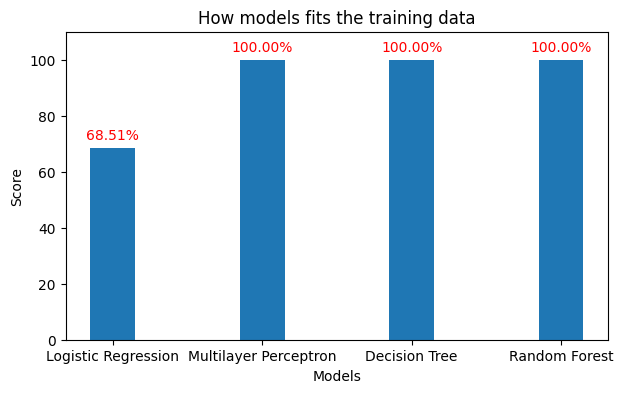

In [7]:
import matplotlib.pyplot as plt
import numpy as np
labels = ["Logistic Regression", "Multilayer Perceptron", "Decision Tree", "Random Forest"]
trainScore = np.array([model_LR.score(x_train,y_train),model_MLP.score(x_train,y_train),model_DT.score(x_train,y_train),model_RF.score(x_train,y_train)])
trainScore = trainScore*100
size = len(labels)
plt.figure(figsize=(7, 4))
for i in range(size):
    plt.text(i,trainScore[i]+3,f'{trainScore[i]:.2f}%',ha = 'center',color='red')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('How models fits the training data')
plt.bar(range(size),trainScore,width=0.3)
plt.xticks(range(size), labels)
plt.ylim(0,110)
plt.show()

### The performance of models on the validation data

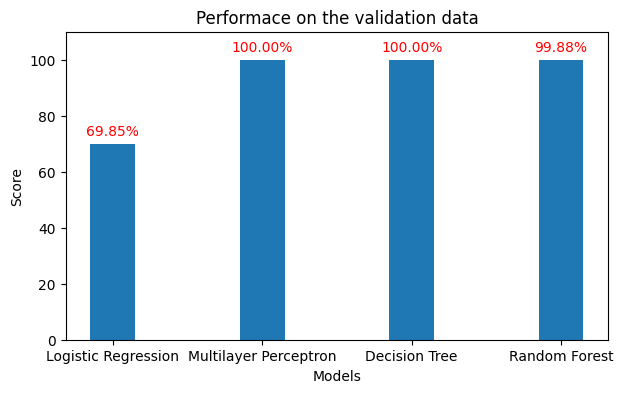

In [8]:
trainScore = np.array([model_LR.score(x_valid,y_valid),model_MLP.score(x_valid,y_valid),model_DT.score(x_valid,y_valid),model_RF.score(x_valid,y_valid)])
trainScore = trainScore*100
size = len(labels)
plt.figure(figsize=(7, 4))
for i in range(size):
    plt.text(i,trainScore[i]+3,f'{trainScore[i]:.2f}%',ha = 'center',color='red')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performace on the validation data')
plt.bar(range(size),trainScore,width=0.3)
plt.xticks(range(size), labels)
plt.ylim(0,110)
plt.show()

We conclude that random forest classifier model works the best. Therefore, we choose random forest model for our final testing.

# Final testing

Patient #1: Probability of having stroke is 0.00%, predict that do not have a stroke. We predicted correctly.
Patient #2: Probability of having stroke is 0.00%, predict that do not have a stroke. We predicted correctly.
Patient #3: Probability of having stroke is 0.00%, predict that do not have a stroke. We predicted correctly.
Patient #4: Probability of having stroke is 0.00%, predict that do not have a stroke. We predicted correctly.
Patient #5: Probability of having stroke is 100.00%, predict that have a stroke. We predicted correctly.
Patient #6: Probability of having stroke is 100.00%, predict that have a stroke. We predicted correctly.
Patient #7: Probability of having stroke is 100.00%, predict that have a stroke. We predicted correctly.
Patient #8: Probability of having stroke is 100.00%, predict that have a stroke. We predicted correctly.
Patient #9: Probability of having stroke is 0.00%, predict that do not have a stroke. We predicted correctly.
Patient #10: Probability of ha

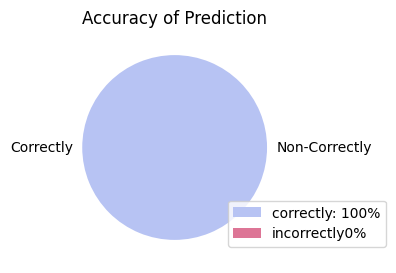

In [9]:
y_final_pred = pd.Series(model_DT.predict(x_test))
y_final_prob = pd.DataFrame(model_DT.predict_proba(x_test)).iloc[:,1]
leng = len(y_final_pred)
cnt = 0

for i in range(leng):
    print(f"Patient #{i+1}: Probability of having stroke is {y_final_prob.iloc[i]*100:.2f}%,",end=" ")
    if y_final_pred.iloc[i] == 0:
        print("predict that do not have a stroke.",end=" ")
    elif y_final_pred.iloc[i] == 1:
        print("predict that have a stroke.",end=" ")
    if y_final_pred.iloc[i]==y_test.iloc[i]:
        cnt+=10
        print('\033[32m'+"We predicted correctly."+'\033[0m')
    else:
        print('\033[31m'+"We didn't predict correctly."+'\033[0m')
        
plt.figure(figsize=(3, 3))
plt.pie([cnt, 100 - cnt], labels=[f'Correctly', f'Non-Correctly'],colors=['#B7C3F3', '#DD7596'])
plt.title('Accuracy of Prediction')
plt.legend([f'correctly: {cnt}%', f'incorrectly{100 - cnt}%'],bbox_to_anchor=(0.7,0.3))
plt.show()